In [273]:
pip install seaborn

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('heart.csv')

Saving heart.csv to heart (2).csv


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB




```
# This is formatted as code
```


cp        نوع درد قفسه سینه
trestbps فشار خون در حالت استراحت
chol mg/dl کلسترول سرم
fbs قند خون ناشتا
restecg نتیجه الکتروکاردیوگرافی در حال استراحت
thalach حداکثر ضربان قلب به دست آمده
exang آنژین ناشی از ورزش
oldpeak افسردگی ناشی از ورزش نسبت به استراحت
slope شیب بخش ورزش اوج
ca تعداد عروق اصلی رنگ شده توسط آلوئوسوپی
thal 3normal 6fixeddefect 7reversabledefectنقص برگشت پذیر 
target هدف


In [277]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1

داده‌های پرت باعث می‌شود ارتباط بین دو متغیر ضعیف شود یا از بین برود اگرچه ممکن است در واقعیت یا بر اساس مبانی نظری ارتباط بین دو متغیر وجود داشته باشد اما نتایج به علت ورود داده‌های پرت ممکن است مخدوش شود و ارتباط بین متغیرها معنادار نشود؛ 

##بررسی تک متغیره

### **age**

در گام اول، شکل توزیع یا پراکندگی داده‌ها را به وسیله محاسبه شاخص‌های مرکزی و پراکندگی برای داده‌های age مشخص می‌کنیم.




In [278]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

همچنین محاسبه ضریب چولگی و کشیدگی  نیز برای نمایش رفتار داده‌ها مناسب است. این شاخص‌ها میزان انحراف از تقارن نسبت به توزیع نرمال را اندازه‌گیری می‌کنند. دستورات زیر به این منظور نوشته شده‌اند.

In [279]:
print("Skewness: %f" % df['age'].skew())
print("Kurtosis: %f" % df['age'].kurt())

Skewness: -0.202463
Kurtosis: -0.542167


 همانطور که از اجرای این دستورات متوجه شده‌اید، ضریب چولگی بسیار کم است و چوله به چپ و ضریب کشیدگی کم و پخی نسبت به حالت نرمال دارد. نیز  دلیل بر وجود چولگی و کشیدگی کم است.

این بار نمودار مقادیر را برای مشاهدات ترسیم می‌کنیم. محور افقی نشانگر شماره مشاهده و محور عمودی نیز سن

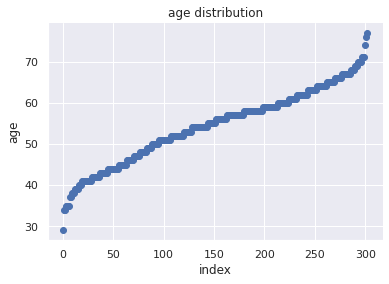

In [280]:
	plt.scatter(range(df.shape[0]), np.sort(df['age'].values))
plt.xlabel('index')
plt.ylabel('age')
plt.title("age distribution")
sns.despine()

نمودارهای فراوانی:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


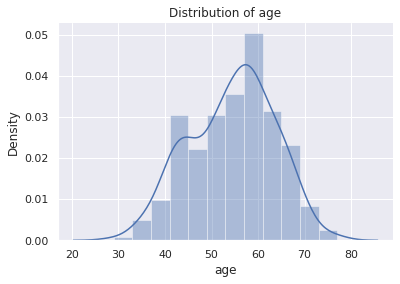

In [281]:
sns.distplot(df['age'])
plt.title("Distribution of age")
sns.despine()




همگی نتایج بالا و نمودارها، نشان می‌دهد که توزیع این داده‌ها به توزیع نرمال، نزذیک است و چوله به راست و برجستگی زیادی به چشم نمی‌خورد اما با استفاده  از آزمون  نرمال بودن داده ها این موضوع را بررسی میکنیم: 

Jarque-Bera آزمون
به منظور پیاده‌سازی آزمون نرمال بودن جارک برا در زبان برنامه‌نویسی پایتون از کتابخانه statsmodels و stattools استفاده می‌شود.

In [282]:


from scipy import stats

stats.jarque_bera(df.age)


(5.9104120157420095, 0.0520679330669892)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


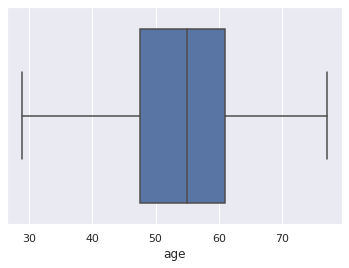

In [283]:
sns.boxplot(df.age)
plt.show()

به منظور پیاده‌سازی آزمون نرمال بودن جارک برا در زبان برنامه‌نویسی پایتون از کتابخانه statsmodels و stattools استفاده می‌شود.

### **cp**

این داده کلا جهار نوع را مشخص می کند 

In [284]:
df['cp'].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

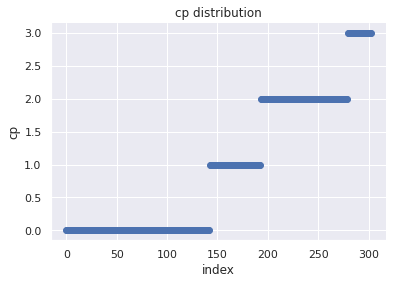

In [285]:
	plt.scatter(range(df.shape[0]), np.sort(df['cp'].values))
plt.xlabel('index')
plt.ylabel('cp')
plt.title("cp distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


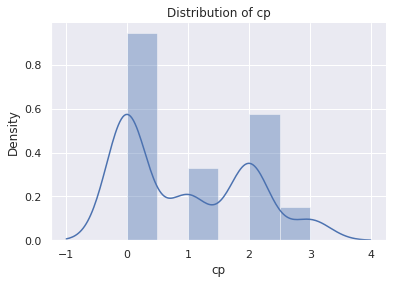

In [286]:
sns.distplot(df['cp'])
plt.title("Distribution of cp")
sns.despine()

###trestbps

In [287]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

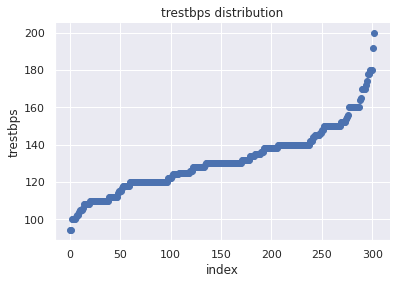

In [288]:
	plt.scatter(range(df.shape[0]), np.sort(df['trestbps'].values))
plt.xlabel('index')
plt.ylabel('trestbps')
plt.title("trestbps distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


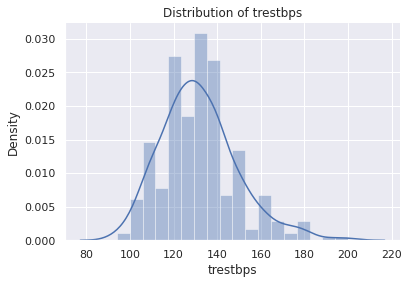

In [289]:
sns.distplot(df['trestbps'])
plt.title("Distribution of trestbps")
sns.despine()

In [290]:
print("Skewness: %f" % df['trestbps'].skew())
print("Kurtosis: %f" % df['trestbps'].kurt())

Skewness: 0.713768
Kurtosis: 0.929054


### chol

بر اساس نمودار ها و نتایج بدست آمده برای این متغیر به نظر میرسد که این متغیر دارای داده های پرت است زیرا میانگین و 75 درصد بالای داده ها از 270 فراتر نرفته اما ماکسیمم 564 است. همچنین در نموار میبینیم که تعداد کمی از داده ها دارای مقدار 564 است در حالی که باقی داده ها از 400 فراتر نرفته است

In [291]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

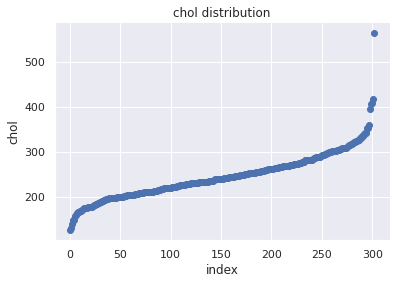

In [292]:
plt.scatter(range(df.shape[0]), np.sort(df['chol'].values))
plt.xlabel('index')
plt.ylabel('chol')
plt.title("chol distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


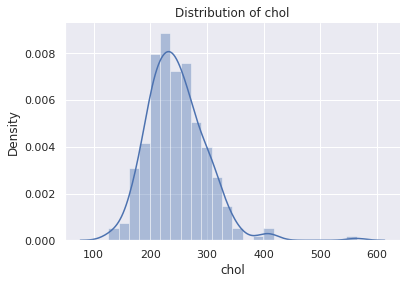

In [293]:
sns.distplot(df['chol'])
plt.title("Distribution of chol")
sns.despine()

In [294]:
print("Skewness: %f" % df['chol'].skew())
print("Kurtosis: %f" % df['chol'].kurt())

Skewness: 1.143401
Kurtosis: 4.505423


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


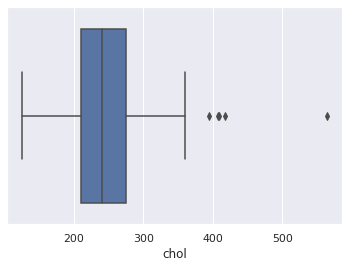

In [295]:
sns.boxplot(df.chol)
plt.show()

نمودار جعبه ای بالا نشان میدهد که داده های بالای 390 داده پرت هستند پس این داده ها را حذف میکنیم

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


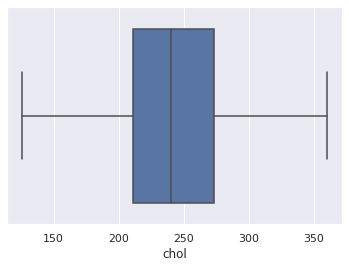

In [296]:
df2 = df[(df.chol < 390)]

sns.boxplot(df2.chol)
plt.show()

### fbs

In [297]:
df['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


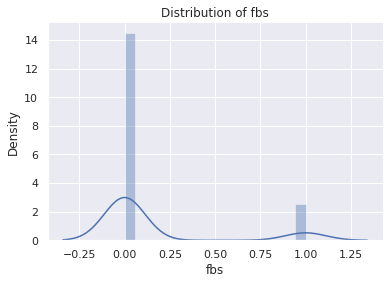

In [298]:
sns.distplot(df['fbs'])
plt.title("Distribution of fbs")
sns.despine()

###restecg

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


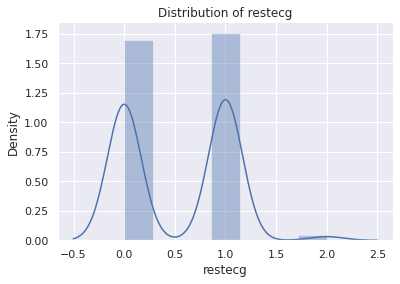

In [299]:

sns.distplot(df['restecg'])
plt.title("Distribution of restecg")
sns.despine()

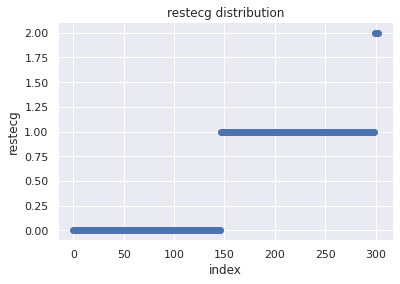

In [300]:
plt.scatter(range(df.shape[0]), np.sort(df['restecg'].values))
plt.xlabel('index')
plt.ylabel('restecg')
plt.title("restecg distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


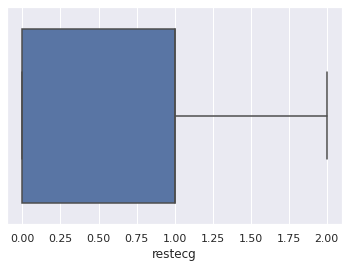

In [301]:

sns.boxplot(df.restecg)
plt.show()

### thalach

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


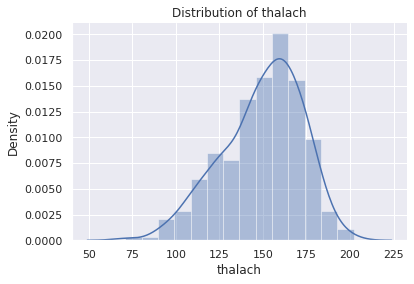

In [302]:
sns.distplot(df['thalach'])
plt.title("Distribution of thalach")
sns.despine()

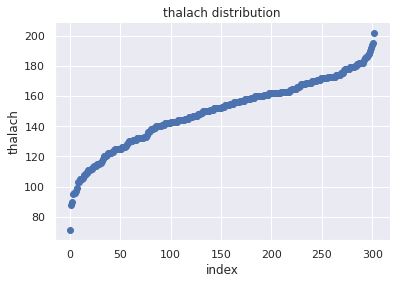

In [303]:
plt.scatter(range(df.shape[0]), np.sort(df['thalach'].values))
plt.xlabel('index')
plt.ylabel('thalach')
plt.title("thalach distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


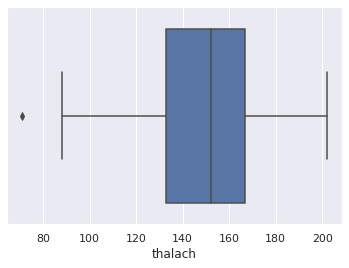

In [304]:
sns.boxplot(df2.thalach)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


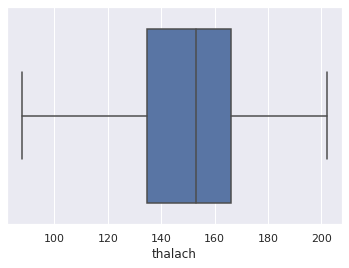

In [305]:
df2 = df[(df.thalach > 80)]

sns.boxplot(df2.thalach)
plt.show()

### exang

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


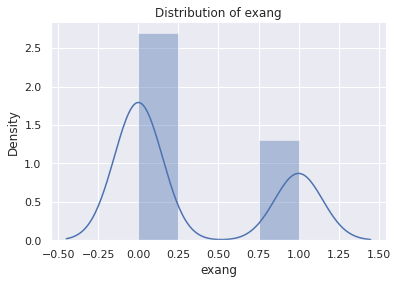

In [306]:
sns.distplot(df['exang'])
plt.title("Distribution of exang")
sns.despine()

### oldpeak

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


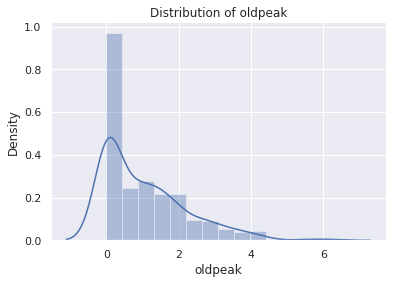

In [307]:
sns.distplot(df['oldpeak'])
plt.title("Distribution of oldpeak")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


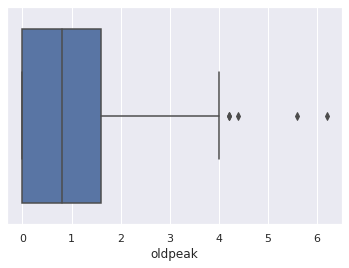

In [308]:
sns.boxplot(df2.oldpeak)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


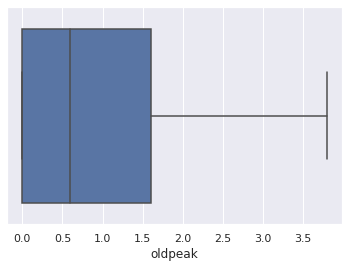

In [309]:
df2 = df[(df.oldpeak < 4)]

sns.boxplot(df2.oldpeak)
plt.show()

In [310]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    int64  
 1   sex       295 non-null    int64  
 2   cp        295 non-null    int64  
 3   trestbps  295 non-null    int64  
 4   chol      295 non-null    int64  
 5   fbs       295 non-null    int64  
 6   restecg   295 non-null    int64  
 7   thalach   295 non-null    int64  
 8   exang     295 non-null    int64  
 9   oldpeak   295 non-null    float64
 10  slope     295 non-null    int64  
 11  ca        295 non-null    int64  
 12  thal      295 non-null    int64  
 13  target    295 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.6 KB


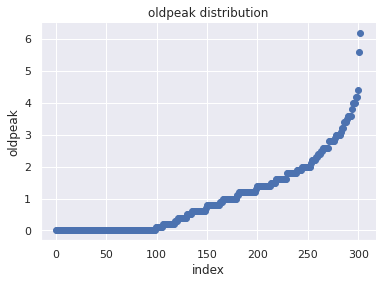

In [311]:
plt.scatter(range(df.shape[0]), np.sort(df['oldpeak'].values))
plt.xlabel('index')
plt.ylabel('oldpeak')
plt.title("oldpeak distribution")
sns.despine()

### slope

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


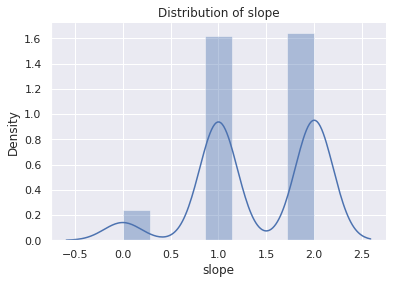

In [312]:
sns.distplot(df['slope'])
plt.title("Distribution of slope")
sns.despine()

### ca

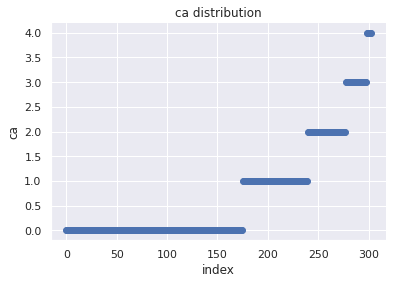

In [313]:
plt.scatter(range(df.shape[0]), np.sort(df['ca'].values))
plt.xlabel('index')
plt.ylabel('ca')
plt.title("ca distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


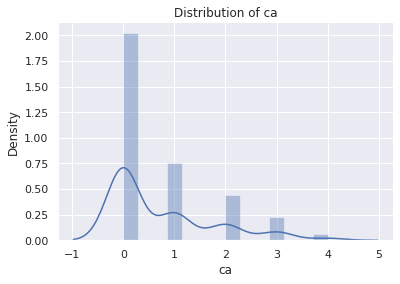

In [314]:
sns.distplot(df['ca'])
plt.title("Distribution of ca")
sns.despine()

###thal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


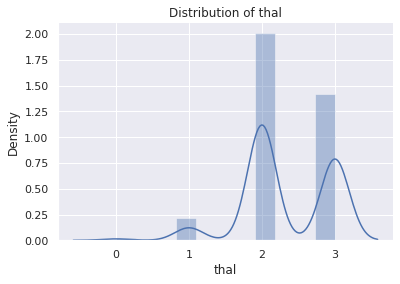

In [315]:
sns.distplot(df['thal'])
plt.title("Distribution of thal")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


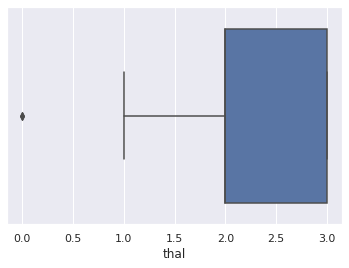

In [316]:
sns.boxplot(df2.thal)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


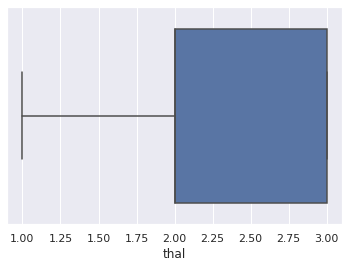

In [317]:
df2 = df[(df.thal > 0.5)]

sns.boxplot(df2.thal)
plt.show()

## الگوریتم حنگل ایزوله

این الگوریتم برای هر یک از مشاهدات مقدار امتیاز یا نمره ناهنجاری را محاسبه کرده و براساس آن نقاط ناهنجار را مشخص می‌کند.

الگوریتم جنگل ایزوله، یکی از مدل‌های مبتنی بر درخت (Tree Models)
 است که براساس تقسیم و تفکیک مشاهدات به نقاط با فراوانی کم و متفاوت از بقیه عمل می‌کند. به این ترتیب نقطه‌ای تصادفی در بین کوچکترین و بزرگترین مقدار انتخاب شده و همسایگی حول آن سنجیده می‌شود. اگر تعداد همسایه یک نقطه نسبت به بقیه نقاط، کم باشد، آن نقطه به عنوان مقدار مشکوک و ناهنجار شناسایی می‌شود.

فرآیندی که در ادامه معرفی می‌شود نحوه عملگرد الگوریتم برای داده‌های chol را مشخص می‌کند. در انتها نیز به کمک کتابخانه Sklearn نحوه پیاده‌سازی آن را در زبان پایتون خواهیم دید.

    ابتدا جنگل ایزوله را توسط داده‌های chol آموزش می‌دهیم.
    مقادیر chol را در یک بردار توسط دستورات کتابخانه Numpy قرار می‌دهیم تا بعدا برای مدل‌سازی از آن استفاده کنیم.
    امتیاز یا نمره ناهنجاری (Anomaly Score) را برای هر یک از مشاهدات محاسبه می‌کنیم. امتیاز ناهنجاری برای یک نمونه براساس میانگین امتیاز ناهنجاری آن خوشه محاسبه می‌شود. به این ترتیب میانگین امتیاز درختان هر جنگل مبنای کار خواهد بود.
    هر یک از مشاهدات را بسته به ناهنجار یا هنجار بودن طبقه بندی می‌کنیم.
    نقاطی که ناهنجار یا داده‌های دور افتاده هستند در نواحی مختلف را به صورت متمایز نشان خواهیم داد.


همانطور که در ادامه می‌بینید استفاده از یک متغیر برای شناسایی مشاهدات ناهنجار برای داده‌های چند متغیره مناسب به نظر نمی‌رسد. ممکن است با استفاده از یک متغیر، بعضی از مشاهدات ناهنجار بوده در حالیکه هنگام استفاده از متغیر دیگر، چنین مشاهداتی کاملا معقول به نظر برسند. بنابراین بهتر است در مواجه با مجموعه داده‌های چند بعدی از تکنیک‌های چند متغیره استفاده شود

###chol

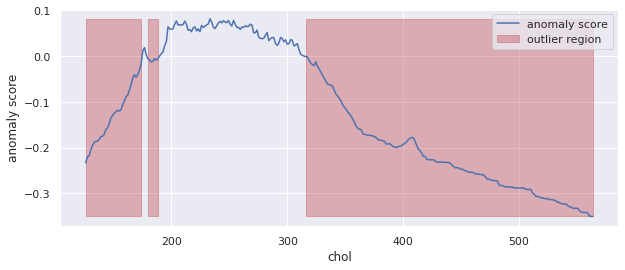

In [318]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['chol'].values.reshape(-1, 1))
xx = np.linspace(df['chol'].min(), df['chol'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('chol')
plt.show();

همانطور که می‌بینید استفاده از یک متغیر برای شناسایی مشاهدات ناهنجار برای داده‌های چند متغیره مناسب به نظر نمی‌رسد. ممکن است با استفاده از یک متغیر، بعضی از مشاهدات ناهنجار بوده در حالیکه هنگام استفاده از متغیر دیگر، چنین مشاهداتی کاملا معقول به نظر برسند. بنابراین بهتر است در مواجه با مجموعه داده‌های چند بعدی از تکنیک‌های چند متغیره استفاده شود.

###thalach

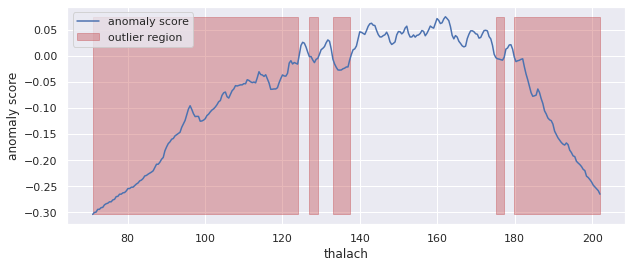

In [319]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['thalach'].values.reshape(-1, 1))
xx = np.linspace(df['thalach'].min(), df['thalach'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('thalach')
plt.show();

###oldpeak

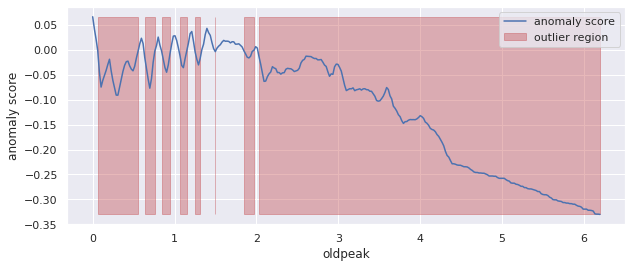

In [320]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['oldpeak'].values.reshape(-1, 1))
xx = np.linspace(df['oldpeak'].min(), df['oldpeak'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('oldpeak')
plt.show();

## چند متغیره

برای این که نقاط پرت را بهتر بدست آوریم، میتوایم به جای درنظر گرفتن یک متغیر دو متغیر که با هم همبستگی دارند را درنظر بگیریم. سپس داده هایی که بر اساس همبستگی این تو متغیر پرت هستند را به عنوان داده پرت در نظر بگیریم. پس ابتدا لازم است که ضرایب همبستگی متغیر ها را بدست آوریم

In [321]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


ایجاد یک نقشه حرارتی

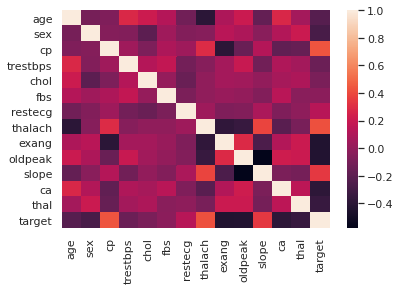

In [322]:
    corr = df.corr()  
    sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


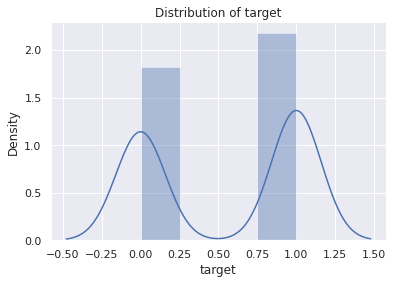

In [323]:
sns.distplot(df['target'])
plt.title("Distribution of target")
sns.despine()

داده های دو کلاس متوازن هستند. اگر داده های یک دسته کمتر از 5درصد باشد یعنی داده های کلاس ها متوازن نیستندو این مسئله باعث می شود که الگوریتم های یادگیری جهتدار شوند. برای مثال در مسئله یافتن تقلب و یا دزدی برق که تعداد داده های متقلب بسیار کمتر از تعداد بدون تقلب هست

 در چنین وضعیتی، مدل پیشگویانه ای که با به کارگیری الگوریتم های یادگیری ماشین ایجاد شده است، جهت دار و یک‌طرفه شده و دقت آن بسیار پایین خواهد بود.

این اتفاق بدین خاطر می‌افتد که الگوریتم‌های یادگیری ماشین معمولا طوری طراحی شده‌اند که با کاهش خطا، دقت مدل را افزایش دهند. بنابراین، این الگوریتم ها توزیع/نسبت یک کلاس نسبت به کل کلاس ها، یا توازن کلاس ها را در محاسبات خود به حساب نمی‌آورند.

رویکردهای متنوعی برای حل مشکل داده‌های نامتوازن وجود دارد که تکنیک‌های نمونه‌برداری مختلفی را به‌کار می‌گیرند.

الگوریتم‌های یادگیری ماشین در مواجهه با دیتاست های نامتوازن ، طبقه‌بندی‌های نامناسبی را ایجاد می‌کنند. در یک دیتاست نامتوازن اگر رویدادی که می‌خواهیم پیش بینی کنیم به کلاس اقلیت تعلق داشته باشد و نرخ آن رویداد کم‌تر از 5 درصد باشد، معمولا یک رویداد نادر محسوب می‌شود.

حل مشکل کلاس های نامتوازن در الگوریتم های پیش بینی

رویکردهای مختلفی برای مواجهه با داده های نامتوازن وجود دارند که در زیر فهرستی از آن‌ها آورده شده است:
الف) رویکرد در سطح داده: تکنیک‌های Resampling

    Random Under Sampling
    Random Over Sampling
    Cluster-Based Over Sampling
    Informed Over Sampling: Synthetic Minority Over Sampling Technique
    Modified synthetic minority oversampling technique (MSMOTE)

 
ب) تکنیک های الگوریتمی تجمعی (Algorithmic Ensemble Techniques)

    Bagging Based
    Boosting-Based
    Adaptive Boosting- Ada Boost
    Gradient Tree Boosting
    XG Boost

 

# 2

pip install -U scikit-learn

In [324]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [325]:
import numpy as np
from sklearn.model_selection import train_test_split

In [326]:
train, test=train_test_split(df2, test_size=0.20, train_size=0.80)

In [327]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 23 to 106
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       240 non-null    int64  
 1   sex       240 non-null    int64  
 2   cp        240 non-null    int64  
 3   trestbps  240 non-null    int64  
 4   chol      240 non-null    int64  
 5   fbs       240 non-null    int64  
 6   restecg   240 non-null    int64  
 7   thalach   240 non-null    int64  
 8   exang     240 non-null    int64  
 9   oldpeak   240 non-null    float64
 10  slope     240 non-null    int64  
 11  ca        240 non-null    int64  
 12  thal      240 non-null    int64  
 13  target    240 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 28.1 KB


In [328]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 35 to 2
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        61 non-null     int64  
 12  thal      61 non-null     int64  
 13  target    61 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 7.1 KB


## 4

 قضیه بیز از روشی برای دسته‌بندی پدید‌ه‌ها بر پایه احتمال وقوع یا عدم وقوع یک پدیده استفاده می‌کند و احتمال رخ دادن یک پدیده محاسبه و دسته بندی می‌شود.

میدانیم احتمال رخداد پیشامد A به شرط B برابر است با احتمال رخداد پیشامد B به شرط A ضرب در احتمال رخداد پیشامد A تقسیم بر احتمال رخداد پیشامد B 
در حالت کلی اگر برای پارامتر توزیع احتمال جامعه آماری نیز یک تابع احتمال در نظر گرفته *شود،*

split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0split_data(data, blocks_num=1, test_block=0

[link text](https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a)

In [329]:
# gaussClf will be the class that will have the Gaussian naive bayes classifier implimentation 
#gauss lf کلاسی خواهد بود که از طبقه بندی پیاده سازی ساده و ساده Gaussian bayes برخوردار است 
class gaussClf:
    def separate_by_classes(self, X, y):
        ''' This function separates our dataset in subdatasets by classes '''
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        print(self.class_freq)
        for class_type in self.classes:
            classes_index[class_type] = np.argwhere(y==class_type)
            subdatasets[class_type] = X[classes_index[class_type], :]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets

#separate_by_classes 
#تابعی است که با آن دیتاست را با کلاس ها جدا میکنیم تا میانگین و انحراف معیار هرکدام را بدست آوریم        

In [330]:
def fit(self, X, y):
    ''' The fitting function '''
    separated_X = self.separate_by_classes(X, y)
    self.means = {}
    self.std = {}
    for class_type in self.classes:
        # Here we calculate the mean and the standart deviation from datasets
        self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
        self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]

In [331]:
def calculate_probability(self, x, mean, stdev):
    ''' This function calculates the class probability using gaussian distribution '''
    exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [332]:
def predict_proba(self, X):
    ''' This function predicts the probability for every class '''
    self.class_prob = {cls:math.log(self.class_freq[cls], math.e) for cls in self.classes}
    for cls in self.classes:
        for i in range(len(self.means)):
            print(X[i])
            self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
    self.class_prob = {cls: math.e**self.class_prob[cls] for cls in self.class_prob}
    return self.class_prob

In [333]:
def predict(self, X):
    ''' This funtion predicts the class of a sample '''
    pred = []
    for x in X:
        pred_class = None
        max_prob = 0
        for cls, prob in self.predict_proba(x).items():
            if prob>max_prob:
                max_prob = prob
                pred_class = cls
        pred.append(pred_class)
    return pred

https://www.antoniomallia.it/lets-implement-a-gaussian-naive-bayes-classifier-in-python.html

کد زیر داده های تقسیم مجموعه داده را به چند قسمت تقسیم می کند (بر اساس تعداد block_num) و به عنوان مجموعه آزمایشی ، قطعه را در موقعیت test_block قرار می دهد که از مجموعه آموزش نیز حذف خواهد شد. اگر غیر از مجموعه داده چیزی ارائه نشود ، این تابع فقط از داده های مشابه برای مجموعه های آموزشی و آزمون استفاده می کند. 

In [334]:
#تقسیم داده های تست  و آموزش
#blocks_num=1 تعداد دسته ها
class gaussClf:
  def split_data(data, blocks_num=1, test_block=0):
     blocks = np.array_split(data, blocks_num)
     # بکلوک هارئ بر اساس تعداد بلوک که میخوای میسازه
     test_set = blocks[test_block]
     #مجموعه تست بلوکی که ?
     if blocks_num > 1:
          del blocks[test_block]
     training_set = pd.concat(blocks)
     return training_set, test_set

  #به هر حال جدا میکنیمبه تست و آموزشی


تخمین P (C)


تخمین P (C) یک نمونه آموزش داده شده بسیار ساده است. احتمالات قبلی بر اساس تجربه قبلی است ، در این حالت ، درصد یک کلاس در مجموعه داده است.

ما می خواهیم فرکانس هر کلاس را بشماریم و با تقسیم بر تعداد مثال ها نسبت را بدست آوریم. کد انجام این کار بسیار مختصر است ، همچنین به این دلیل که کتابخانه pandas محاسبه فرکانس ها را پیش پا افتاده می کند. 


با تقسیم تعداد داده هایی که در اون کلاس هستند تقسیم بر کل داده ها

In [345]:
def __prior(self):
    counts = self.__training_set["Class"].value_counts().to_dict()
    self.__priors = {(k, v / self.__n) for k, v in counts.items()}

#خط اول برای هر کلاس تعدادش رو میشمره و ذخیره میکنه
#خط دوم ک و وی همون دو دسته صفر و یک هستد که برای هرکدوم عدد بدست آمده رو تقسیم بر کل داده ها میکنه تااحتمال اون کلاس رو بدست بیاره

محاسبه میانگین و واریانس برای هر ویژگی برای بدست آوردن ابع چگالی احتمال

برای بدست آوردن تابع چگالی احتمال باید در هرکلاس  برای هرکدام از  ویژگی ها تابع چگالی و احتمال را بدست بیاوریم پس از آنجا که 3 ویژگیو 2 کلاس داریم باید 6 جفت واریانس و انجراف معیار بدست آوریم.

برای این کار از کتابخانه پانداز استفاده کرده و برای هر ستون میانگین و انحراف معیار را محاسبه میکنیم

In [336]:
def __calculate_mean_variance(self):
    self.__mean_variance = {}
    for c in self.__training_set["target"].unique(): #برای هرکدوم از کلاس هایی که داریم این فور را تگرار کن
        filtered_set = self.__training_set[ #فیلتر کردن داده آموزشی بر اساس نوع کلاس پس از اینجا تا آخر فور فییلتر ست همون داده های دسته خاص هستد
            (self.__training_set['target'] == c)]
        m_v = {}  #یک شی خالی ساختیم
        for attr_name in ATTR_NAMES:
            m_v[attr_name] = []
            m_v[attr_name].append(filtered_set[attr_name].mean()) #حساب کردن میانگین برای آن ستون خاص
            m_v[attr_name].append(
                math.pow(filtered_set[attr_name].std(), 2))  #حساب کردن واریانس برای آن ستون خاص
        self.__mean_variance[c] = m_v


تابع چگالی احتمال گاوسی

با توجه به فرمول تابع چگالی احتمال گ.سی که فقط به واریانس و میانپین نیاز دارد، برای هرکدام از متغیر ها تابغ چگالی را بر اساس اطلاعات بدست آمده از تابعی که بالا تعریف کرده ایم محاسبه میکنیم

In [337]:
@staticmethod
def __calculate_probability(x, mean, variance):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * variance))) #محاسبه ای به توان در فرمول
    return (1 / (math.sqrt(2 * math.pi * variance))) * exponent  #محاسبه تابع چگالی احتمال


Predict پیشبینی

اکنون که همه چیز را سر جای خود داریم ، وقت آن است که کلاسهای خود را پیش بینی
 کنیم.

اساساً آنچه در زیر انجام می شود ، تکرار آن از طریق مجموعه آزمون است و برای هر نمونه احتمال هر کلاس را با استفاده از قضیه بیز محاسبه می کند. تنها تفاوت در اینجا این است که ما از احتمالات log استفاده می کنیم زیرا احتمالات مربوط به هر کلاس که مقدار صفتی دارند ، کم است و می تواند زیر آب رود. 


In [338]:
def predict(self):
    predictions = {}
    for _, row in self.__test_set.iterrows(): #برای هر نمونه در تست فور را ترار می کند
        results = {}  # شی نتیحه را ساختیم
        for k, v in self.__priors:  # بر اساس کا و وی تکرار میکنیم یعنی برای هرکدام از کلاس ها احتمال را حساب می کنیم
            p = 0
            for attr_name in ATTR_NAMES:  #برای هر ویژگی تکرار میکنیم
                prob = self.__calculate_probability(row[attr_name], self.__mean_variance[  #احتمال را محاسبه مینکنیم
                    k][attr_name][0], self.__mean_variance[k][attr_name][1])
                if prob > 0:
                    p += math.log(prob)
            results[k] = math.log(v) + p
        predictions[int(row["num"])] = max([key for key in results.keys() if results[
            key] == results[max(results, key=results.get)]])
    return predictions


دقت

هنگامی که پیش بینی ها را بدست آوردیم ، می توانیم آنها را با مقدار کلاس موجود در مجموعه داده آزمایش مقایسه کنیم ، بنابراین می توانیم نسبت درست ها را به تعداد کل پیش بینی ها محاسبه کنیم. 

In [339]:
def calculate_accuracy(test_set, predictions):
    correct = 0
    for _, t in test_set.iterrows():
        if t["target"] == predictions[t["num"]]:
            correct += 1
    return (correct / len(test_set)) * 100.0


#5

#6

In [353]:
#تقسیم داده های تست  و آموزش
#blocks_num=1 تعداد دسته ها

a,b=split_data(df3, blocks_num=1, test_block=0)
  

In [346]:
from sklearn.naive_bayes import GaussianNB

In [347]:
clf= GaussianNB()

In [354]:
a.head()

,trestbps,chol,thalach,target
0,145,233,150,1
1,130,250,187,1
2,130,204,172,1
3,120,236,178,1
4,120,354,163,1


In [356]:
a["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 301, dtype: int64

In [360]:
b=a.drop("trestbps",axis=1)

In [361]:
b=b.drop("chol",axis=1)

In [362]:
b=b.drop("thalach",axis=1)


In [367]:
a=a.drop("target",axis=1)


KeyError: ignored

In [369]:
a.head()

,trestbps,chol,thalach
0,145,233,150
1,130,250,187
2,130,204,172
3,120,236,178
4,120,354,163


In [370]:
clf.fit(a,b)

AttributeError: ignored